In [1]:
%pylab inline
import pandas as pd 
import seaborn as sns 

Populating the interactive namespace from numpy and matplotlib


# Load the sequence

In [2]:
def readseqalign(fname,Verbose=True):
    """
    Reads the sequence alignment and returns a dataframe
    """
    df_seqalign = pd.DataFrame()
    seq=[]
    title=None
    with open(fname,'r') as infile:
        for line in infile:
            if(Verbose):
                print "line",line 
            
            if line.startswith('>'):
                if(title):
                    df_seqalign[title] = seq
                    seq=[]
                title = line.strip('\n')[1:]
                
                if(Verbose):
                    print "title",title
                continue
            
            seq = seq + list(line.strip('\n'))
            if(Verbose):
                print seq 
    df_seqalign[title] = seq      
    return df_seqalign 

In [3]:
df_seqalign = readseqalign('aln.fas',Verbose=False)

In [4]:
df_seqalign.head()

,2WNW,1OGS
0,-,A
1,-,R
2,-,P
3,-,C
4,-,I


In [5]:
df_seqalign['2WNW'].values

array(['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', 'M', 'K', 'G', 'R', 'L', 'I', 'S',
       'S', 'D', 'P', 'Y', 'R', 'Q', 'Q', 'F', 'L', 'V', 'E', 'R', '-',
       'A', 'V', 'S', 'F', 'S', 'H', 'R', 'Q', 'R', 'D', 'C', 'S', 'E',
       'L', 'I', 'S', 'V', 'L', 'P', 'R', 'H', 'A', 'L', 'Q', 'Q', 'I',
       'D', 'G', 'F', 'G', 'G', 'S', 'F', 'T', 'E', 'G', 'A', 'G', 'V',
       'V', 'F', 'N', 'S', 'M', 'S', 'E', 'K', 'T', 'K', 'A', 'Q', 'F',
       'L', 'S', 'L', 'Y', 'F', 'S', 'A', 'Q', 'E', 'H', 'N', 'Y', 'T',
       'L', 'A', 'R', 'M', 'P', 'I', 'Q', 'S', 'C', 'D', 'F', 'S', 'L',
       'G', 'N', 'Y', 'A', 'Y', 'V', 'D', 'S', 'S', 'A', 'D', 'L', 'Q',
       'Q', 'G', 'R', 'L', 'S', 'F', 'S', 'R', 'D', 'E', 'A', '-', 'H',
       'L', 'I', 'P', 'L', 'I', 'S', 'G', 'A', 'L', 'R', 'L', 'N', '-',
       'P', 'H', 'M', 'K', 'L', 'M', 'A', 'S', 'P', 'W', 'S', 'P

In [6]:
df_seqalign['1OGS'].values

array(['A', 'R', 'P', 'C', 'I', 'P', 'K', 'S', 'F', 'G', 'Y', 'S', 'S',
       'V', 'V', 'C', 'V', 'C', 'N', 'A', 'T', 'Y', 'C', 'D', 'S', 'F',
       'D', 'P', 'P', 'T', 'F', 'P', 'A', 'L', 'G', 'T', 'F', 'S', 'R',
       'Y', 'E', 'S', 'T', 'R', 'S', 'G', 'R', 'R', 'M', 'E', 'L', 'S',
       'M', 'G', 'P', 'I', 'Q', 'A', 'N', 'H', 'T', 'G', 'T', 'G', 'L',
       'L', 'L', 'T', 'L', 'Q', 'P', 'E', 'Q', 'K', 'F', 'Q', 'K', 'V',
       'K', 'G', 'F', 'G', 'G', 'A', 'M', 'T', 'D', 'A', 'A', 'A', 'L',
       'N', 'I', 'L', 'A', 'L', 'S', 'P', 'P', 'A', 'Q', 'N', 'L', 'L',
       'L', 'K', 'S', 'Y', 'F', 'S', 'E', 'E', 'G', 'I', 'G', 'Y', 'N',
       'I', 'I', 'R', 'V', 'P', 'M', 'A', 'S', 'C', 'D', 'F', 'S', 'I',
       'R', 'T', 'Y', 'T', 'Y', 'A', 'D', 'T', 'P', 'D', 'D', 'F', 'Q',
       'L', 'H', 'N', 'F', 'S', 'L', 'P', 'E', 'E', 'D', 'T', 'K', 'L',
       'K', 'I', 'P', 'L', 'I', 'H', 'R', 'A', 'L', 'Q', 'L', 'A', 'Q',
       'R', 'P', 'V', 'S', 'L', 'L', 'A', 'S', 'P', 'W', 'T', 'S

# Load the DFI Files

In [7]:
import glob 

In [8]:
csvfiles = glob.glob('*.csv')

In [9]:
csvfiles

['1ogs-dfianalysis.csv', '2wnw-dfianalysis.csv']

In [10]:

dfidict = {fname.split('-')[0].upper(): pd.read_csv(fname) for fname in csvfiles}
    

In [11]:
dfidict['1OGS'].head()

,ResI,chainID,Res,R,dfi,pctdfi,fdfi,pctfdfi,adfi,ravg,A
0,1,A,ALA,A,0.002001,0.591549,0.313269,0.016097,-0.076459,33.973979,NotA
1,2,A,ARG,R,0.001925,0.559356,0.307688,0.014085,-0.094567,32.913771,NotA
2,3,A,PRO,P,0.001796,0.494970,0.321535,0.018109,-0.116700,31.924200,NotA
3,4,A,CYS,C,0.001666,0.416499,0.336214,0.030181,-0.183099,29.326847,NotA
4,5,A,ILE,I,0.001800,0.496982,0.343122,0.036217,-0.124748,30.730385,NotA


In [12]:
dfidict.keys()

['2WNW', '1OGS']

In [13]:
dfidict['2WNW'].shape

(445, 13)

In [14]:
dfalign = pd.DataFrame()

In [15]:
dfalign['1OGS_R'] = dfidict['1OGS']['R'].values
dfalign['1OGS_pctdfi'] = dfidict['1OGS']['pctdfi'].values

In [16]:
dfalign.shape

(497, 2)

In [17]:
dfidict['2WNW']['R'].values.shape

(445,)

In [18]:
padding = np.array(['-' for i in range(52)])

In [19]:
dfalign['2WNW_R'] = dfidict['2WNW']['R']

In [20]:
dfalign['2WNW_pctdfi'] = dfidict['2WNW']['pctdfi']

In [21]:
dfalign

,1OGS_R,1OGS_pctdfi,2WNW_R,2WNW_pctdfi
0,A,0.591549,M,0.970787
1,R,0.559356,K,0.961798
2,P,0.494970,G,0.910112
3,C,0.416499,R,0.858427
4,I,0.496982,L,0.683146
5,P,0.503018,I,0.530337
6,K,0.555332,S,0.460674
7,S,0.579477,S,0.485393
8,F,0.619718,D,0.685393
9,G,0.696177,P,0.689888


In [22]:
dfalign = pd.DataFrame()
for name in ['1OGS','2WNW']:
    dfalign[name+'_R']= dfidict[name]['R']
    dfalign[name+'_pctdfi'] = dfidict[name]['pctdfi']

In [23]:
dfalign.head()

,1OGS_R,1OGS_pctdfi,2WNW_R,2WNW_pctdfi
0,A,0.591549,M,0.970787
1,R,0.559356,K,0.961798
2,P,0.494970,G,0.910112
3,C,0.416499,R,0.858427
4,I,0.496982,L,0.683146


In [24]:
len(dfalign)

497

In [25]:
len(df_seqalign)

497

In [26]:

def ls_mapdfival(name,df_seqalign,dfalign,Verbose=False):
    """
    Map dfi values from dfi csvvalues to aligned seqeuences 
    
    Input
    -----
    name
    df_seqalign: sequence from sequence alignment (DataFrame)
    dfalign: dfi values (DataFrame)
    
    Output
    ------
    Returned Mapped DFI values
    """
    ls_seq=df_seqalign[name].values
    ls_dfiseq=dfalign[name+'_R'].values
    ls_dfival=dfalign[name+'_pctdfi'].values
    no_gap_seq=np.array([pos for pos in ls_seq if pos != '-'])
    print "len(ls_dfiseq)",len(ls_dfiseq),"len(ls_seq)",len(ls_seq), "no_gap_seq", len(no_gap_seq), len(ls_dfival)
    low = min(len(ls_seq),len(ls_dfiseq))
    dfimapval = []
    marker=0
    for i,seqpos in enumerate(ls_seq):
        if(Verbose):
            print "seqpos",seqpos,"marker",marker,"i",i
        while(marker < len(ls_seq)):
            if(seqpos == '-'):
                if(Verbose):
                    print "seqpos",seqpos,"insertion"
                dfimapval.append('-')
                break 
            if(seqpos == ls_dfiseq[marker]):
                if(Verbose):
                    print "seqpos",seqpos,"dfiseq",ls_dfiseq[marker],marker
                dfimapval.append(ls_dfival[marker])
                marker +=1 
                break 
            else:
                marker +=1
        
    return ls_seq,dfimapval 

In [27]:
dfx = pd.DataFrame()
for name in dfidict.keys():
    print name
    testseq,testval = ls_mapdfival(name,df_seqalign,dfalign,Verbose=True)
    #print len(testseq),len(testval)
    dfx[name+'_R'] = testseq
    dfx[name+'_pctdfi'] = testval 

2WNW
len(ls_dfiseq) 497 len(ls_seq) 497 no_gap_seq 445 497
seqpos - marker 0 i 0
seqpos - insertion
seqpos - marker 0 i 1
seqpos - insertion
seqpos - marker 0 i 2
seqpos - insertion
seqpos - marker 0 i 3
seqpos - insertion
seqpos - marker 0 i 4
seqpos - insertion
seqpos - marker 0 i 5
seqpos - insertion
seqpos - marker 0 i 6
seqpos - insertion
seqpos - marker 0 i 7
seqpos - insertion
seqpos - marker 0 i 8
seqpos - insertion
seqpos - marker 0 i 9
seqpos - insertion
seqpos - marker 0 i 10
seqpos - insertion
seqpos - marker 0 i 11
seqpos - insertion
seqpos - marker 0 i 12
seqpos - insertion
seqpos - marker 0 i 13
seqpos - insertion
seqpos - marker 0 i 14
seqpos - insertion
seqpos - marker 0 i 15
seqpos - insertion
seqpos - marker 0 i 16
seqpos - insertion
seqpos - marker 0 i 17
seqpos - insertion
seqpos - marker 0 i 18
seqpos - insertion
seqpos - marker 0 i 19
seqpos - insertion
seqpos - marker 0 i 20
seqpos - insertion
seqpos - marker 0 i 21
seqpos - insertion
seqpos - marker 0 i 22
seqp

In [28]:
dfx.columns

Index([u'2WNW_R', u'2WNW_pctdfi', u'1OGS_R', u'1OGS_pctdfi'], dtype='object')

In [29]:
dfx = dfx[~(dfx['2WNW_R'] == '-')]

In [30]:
dfx = dfx[~(dfx['1OGS_R'] == '-')]

In [31]:
dfx.T

,32,33,34,35,36,37,38,39,40,41,...,487,488,489,490,491,492,493,494,495,496
2WNW_R,M,K,G,R,L,I,S,S,D,P,...,G,A,S,T,L,L,W,R,Q,E
2WNW_pctdfi,0.970787,0.961798,0.910112,0.858427,0.683146,0.530337,0.460674,0.485393,0.685393,0.689888,...,0.552809,0.173034,0.123596,0.0629213,0.249438,0.54382,0.791011,0.865169,0.925843,0.979775
1OGS_R,A,L,G,T,F,S,R,Y,E,S,...,S,I,H,T,Y,L,W,H,R,Q
1OGS_pctdfi,0.977867,0.973843,0.975855,0.939638,0.812877,0.67002,0.420523,0.1167,0.102616,0.158954,...,0.301811,0.0684105,0.0301811,0.0201207,0.191147,0.44668,0.746479,0.881288,0.913481,0.979879


In [32]:
dfx.head()

,2WNW_R,2WNW_pctdfi,1OGS_R,1OGS_pctdfi
32,M,0.970787,A,0.977867
33,K,0.961798,L,0.973843
34,G,0.910112,G,0.975855
35,R,0.858427,T,0.939638
36,L,0.683146,F,0.812877


In [33]:
dficols = [col for col in dfx.columns if '_pctdfi' in col]

# CSA sites 

In [56]:
dfidict['1OGS'][dfidict['1OGS'].ResI.isin([340,342,235])]

,ResI,chainID,Res,R,dfi,pctdfi,fdfi,pctfdfi,adfi,ravg,A
234,235,A,GLU,E,0.001380,0.213280,2.888694,0.993964,0.002012,8.023082,A
339,340,A,GLU,E,0.001306,0.160966,3.485464,0.997988,-0.002012,5.692670,NotA
341,342,A,CYS,C,0.001368,0.201207,5.581713,1.000000,0.004024,6.970116,NotA


In [59]:
dfx.ix[[234,339,341]]

,2WNW_R,2WNW_pctdfi,1OGS_R,1OGS_pctdfi
234,E,0.150562,E,0.213280
339,E,0.103371,E,0.160966
341,C,0.2,C,0.201207


# Disease Sites

In [60]:
dfidict['1OGS'][dfidict['1OGS'].ResI.isin([255,123,375])]


,ResI,chainID,Res,R,dfi,pctdfi,fdfi,pctfdfi,adfi,ravg,A
122,123,A,MET,M,0.000917,0.014085,0.711388,0.663984,-0.164990,15.879130,NotA
254,255,A,HIS,H,0.001847,0.521127,0.744313,0.692153,0.086519,20.885014,NotA
374,375,A,VAL,V,0.001774,0.482897,0.836093,0.808853,-0.024145,15.865680,A


In [62]:
dfx.ix[[122,254,374]]

,2WNW_R,2WNW_pctdfi,1OGS_R,1OGS_pctdfi
122,I,0.00898876,M,0.014085
254,E,0.393258,H,0.521127
374,C,0.402247,V,0.482897


In [66]:
dfx

,2WNW_R,2WNW_pctdfi,1OGS_R,1OGS_pctdfi
32,M,0.970787,A,0.977867
33,K,0.961798,L,0.973843
34,G,0.910112,G,0.975855
35,R,0.858427,T,0.939638
36,L,0.683146,F,0.812877
37,I,0.530337,S,0.670020
38,S,0.460674,R,0.420523
39,S,0.485393,Y,0.116700
40,D,0.685393,E,0.102616
41,P,0.689888,S,0.158954


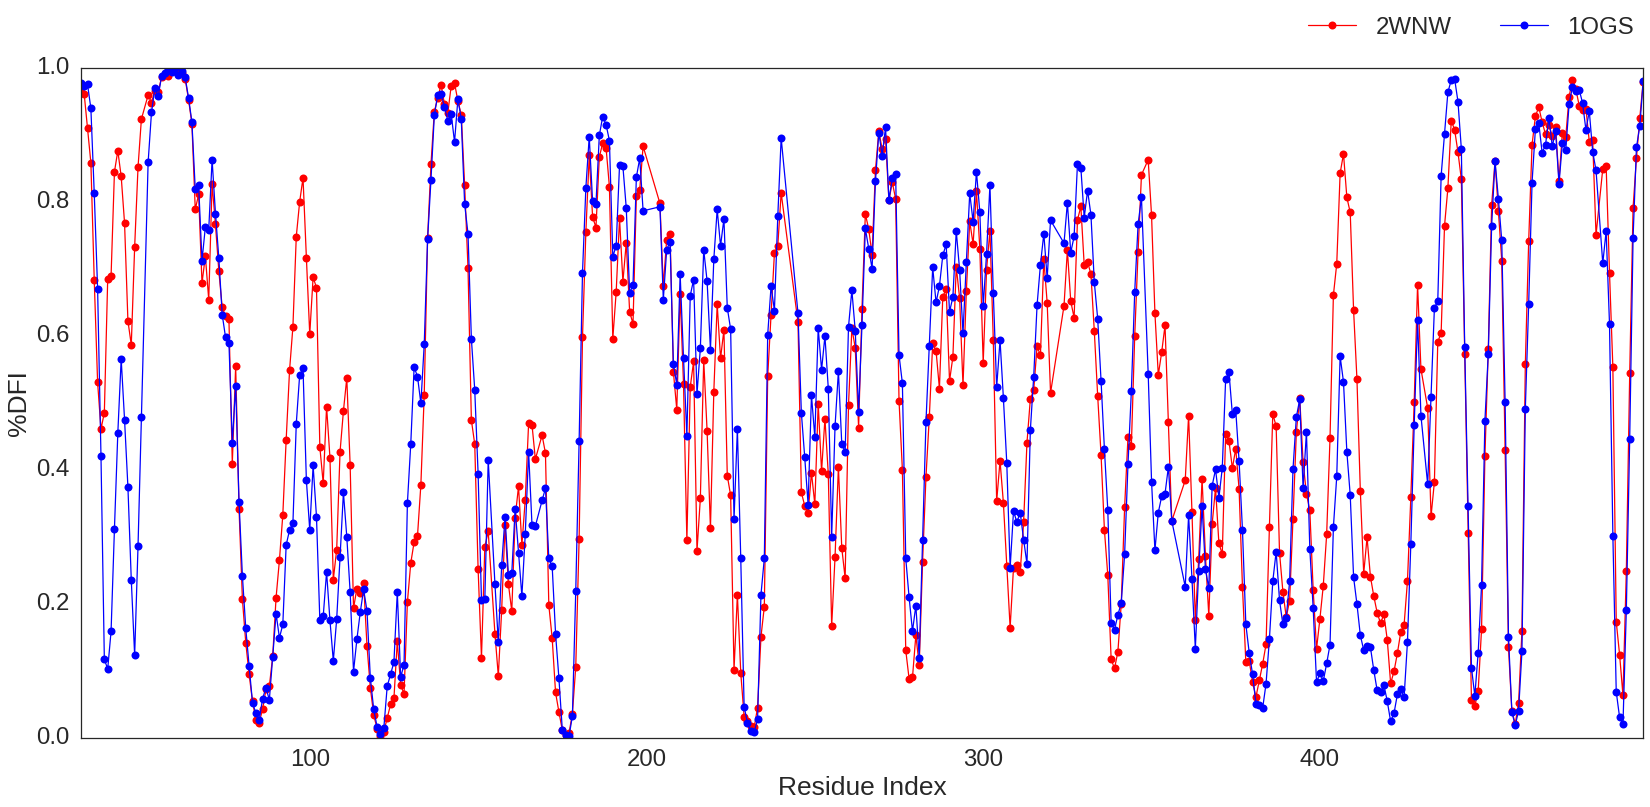

In [44]:
sns.set_style('white')
plt.figure(figsize=(28, 12))
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 1.25,"lines.markersize":8})
dfx['2WNW_pctdfi'].plot(marker='o',label='2WNW',color='red')
dfx['1OGS_pctdfi'].plot(marker='o',label='1OGS',color='blue')
plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=7,ncol=4, borderaxespad=0.)
plt.ylabel('%DFI')
plt.xlabel('Residue Index')

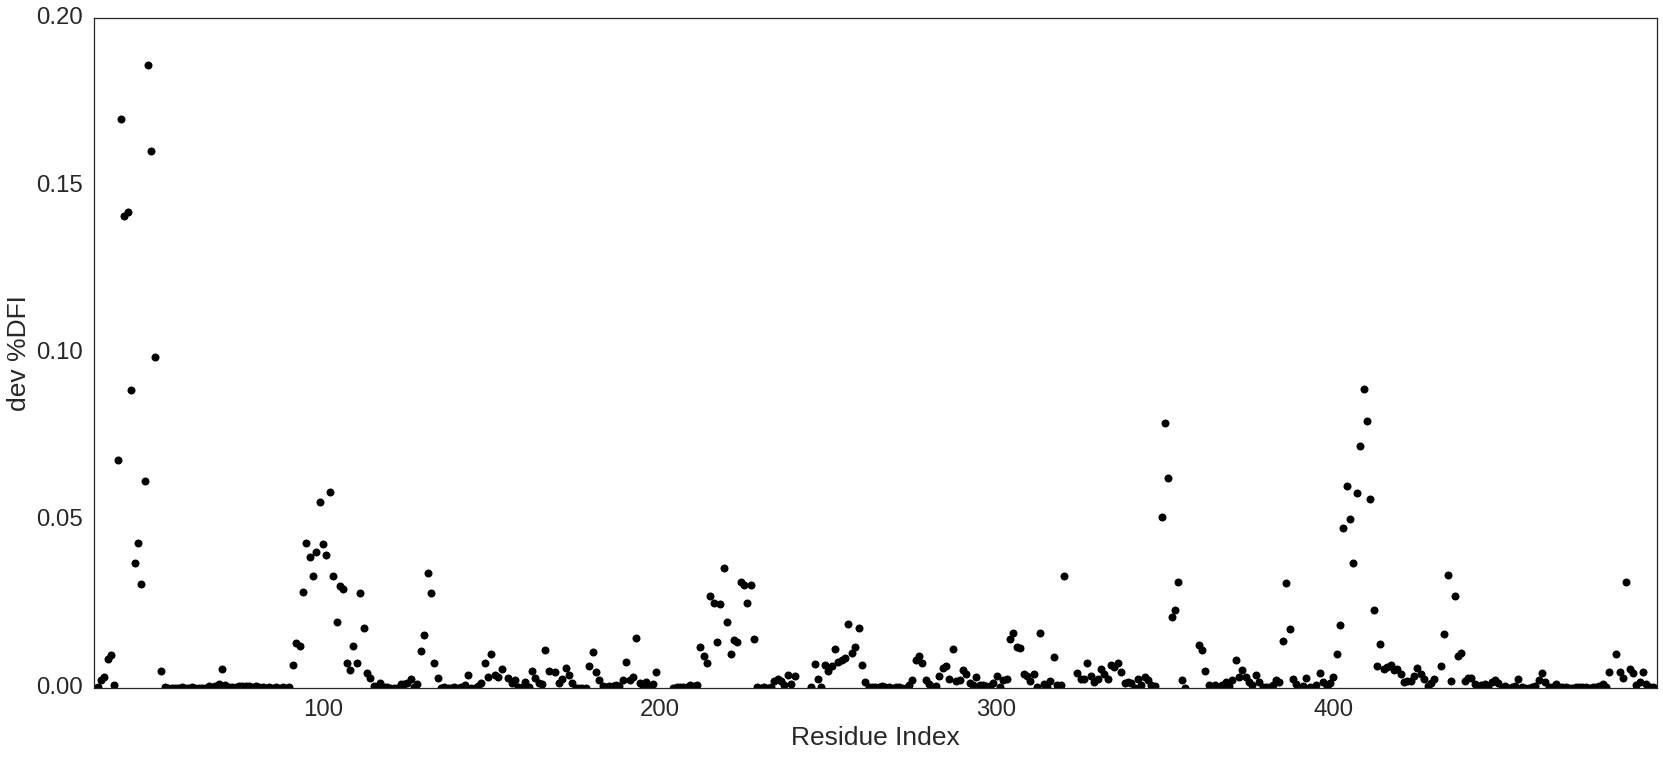

In [67]:
sns.set_style('white')
plt.figure(figsize=(28, 12))
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 1.25,"lines.markersize":8})
dfx[dficols].var(axis=1).plot(marker='o',linestyle='',color='black')
plt.ylabel('dev %DFI')
plt.xlabel('Residue Index')

In [35]:
def make_fafsta(name,df_dfi):
    seq = ''.join(df_dfi.R.values)
    print ">%s"%name
    print seq

In [36]:
make_fafsta('2WNW',dfidict['2WNW'])

>2WNW
MKGRLISSDPYRQQFLVERAVSFSHRQRDCSELISVLPRHALQQIDGFGGSFTEGAGVVFNSMSEKTKAQFLSLYFSAQEHNYTLARMPIQSCDFSLGNYAYVDSSADLQQGRLSFSRDEAHLIPLISGALRLNPHMKLMASPWSPPAFMKTNNDMNGGGKLRRECYADWADIIINYLLEYRRHGINVQALSVQNEPVAVKTWDSCLYSVEEETAFAVQYLRPRLARQGMDEMEIYIWDHDKDGLVDWAELAFADEANYKGINGLAFHWYTGDHFSQIQYLAQCLPDKKLLFSEGCVPMESDAGSQIRHWHTYLHDMIGNFKSGCSGFIDWNLLLNSEGGPNHQGNLCEAPIQYDAQNDVLRRNHSWYGIGHFCRYVRPGARVMLSSSYDNLLEEVGFVNPDGERVLVVYNRDVQERRCRVLDGDKEIALTLPPSGASTLLWRQE


In [37]:
make_fafsta('1OGS',dfidict['1OGS'])

>1OGS
ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTFSRYESTRSGRRMELSMGPIQANHTGTGLLLTLQPEQKFQKVKGFGGAMTDAAALNILALSPPAQNLLLKSYFSEEGIGYNIIRVPMASCDFSIRTYTYADTPDDFQLHNFSLPEEDTKLKIPLIHRALQLAQRPVSLLASPWTSPTWLKTNGAVNGKGSLKGQPGDIYHQTWARYFVKFLDAYAEHKLQFWAVTAENEPSAGLLSGYPFQCLGFTPEHQRDFIARDLGPTLANSTHHNVRLLMLDDQRLLLPHWAKVVLTDPEAAKYVHGIAVHWYLDFLAPAKATLGETHRLFPNTMLFASEACVGSKFWEQSVRLGSWDRGMQYSHSIITNLLYHVVGWTDWNLALNPEGGPNWVRNFVDSPIIVDITKDTFYKQPMFYHLGHFSKFIPEGSQRVGLVASQKNDLDAVALMHPDGSAVVVVLNRSSKDVPLTIKDPAVGFLETISPGYSIHTYLWHRQ


In [63]:
!cat aln.fas

>2WNW
--------------------------------MKGRLISSDPYRQQFLVER-AVSFSHRQ
RDCSELISVLPRHALQQIDGFGGSFTEGAGVVFNSMSEKTKAQFLSLYFSAQEHNYTLAR
MPIQSCDFSLGNYAYVDSSADLQQGRLSFSRDEA-HLIPLISGALRLN-PHMKLMASPWS
PPAFMKTNNDMNGGGKLRRE----CYADWADIIINYLLEYRRHGINVQALSVQNEPVAVK
T----WDSCLYSVEEETAFAVQYLRPRLARQGMDEMEIYIWDHDKDGLVDWAELAFADEA
NYKGINGLAFHWYTGDHFSQI---QYLAQCLPDKKLLFSEGCVPMESD-AGSQIRHW---
HTYLHDMIGNFKSGCSGFIDWNLLLNSEGGPNHQGNLCEAPIQYDAQNDVLRRNHSWYGI
GHFCRYVRPGA-RVMLSSSYDNLLEEVGFVNPDGERVLVVYNRDVQERRCRVLDGDKEIA
LTL-PPSGASTLLWRQE
>1OGS
ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTFSRYESTRSGRRMELSMGPIQANH
TGTGLLLTLQPEQKFQKVKGFGGAMTDAAALNILALSPPAQNLLLKSYFSEEGIGYNIIR
VPMASCDFSIRTYTYADTPDDFQLHNFSLPEEDTKLKIPLIHRALQLAQRPVSLLASPWT
SPTWLKTNGAVNGKGSLKGQPGDIYHQTWARYFVKFLDAYAEHKLQFWAVTAENEPSAGL
LSGYPFQCLGFTPEHQRDFIARDLGPTLANSTHHNVRLLMLDDQRLLLPHWAKVVLTDPE
AAKYVHGIAVHWYLDFLAPAKATLGETHRLFPNTMLFASEACVGSKFWEQSVRLGSWDRG
MQYSHSIITNLLYHVVGWTDWNLALNPEGGPNWVRNFVDSPIIVDITKDTFYKQPMFYHL
GHFSKFIPEGSQRVGLVASQKNDLDAVALMHPDGSAVVVVLNRSSKDVPLTIKDP